In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

import os
import sys
import ast
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlpremier.cnn.preprocess import generate_cnn_data, split_preprocess_cnn_data
from mlpremier.cnn.model import build_train_cnn
from mlpremier.cnn.evaluate import gridsearch_analysis
import tensorflow as tf
import random


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22'], Position: FWD =======
Total players of type FWD = 190.
0 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (5943, 6).
Generated combined features dataframe for preprocessing of shape: (6511, 6).

========== EDA ==========
Selected Statistics:
      total_points  clean_sheets  goals_conceded         bps  \
mean      1.352634      0.081554        0.426509    4.387652   
min      -2.000000      0.000000        0.000000  -16.000000   
max      24.000000      1.000000        9.000000  128.000000   
std       2.628695      0.273705        0.917870   10.558473   

      matchup_difficulty  
mean           -0.254032  
min            -3.000000  
max             3.000000  
std             1.338766  


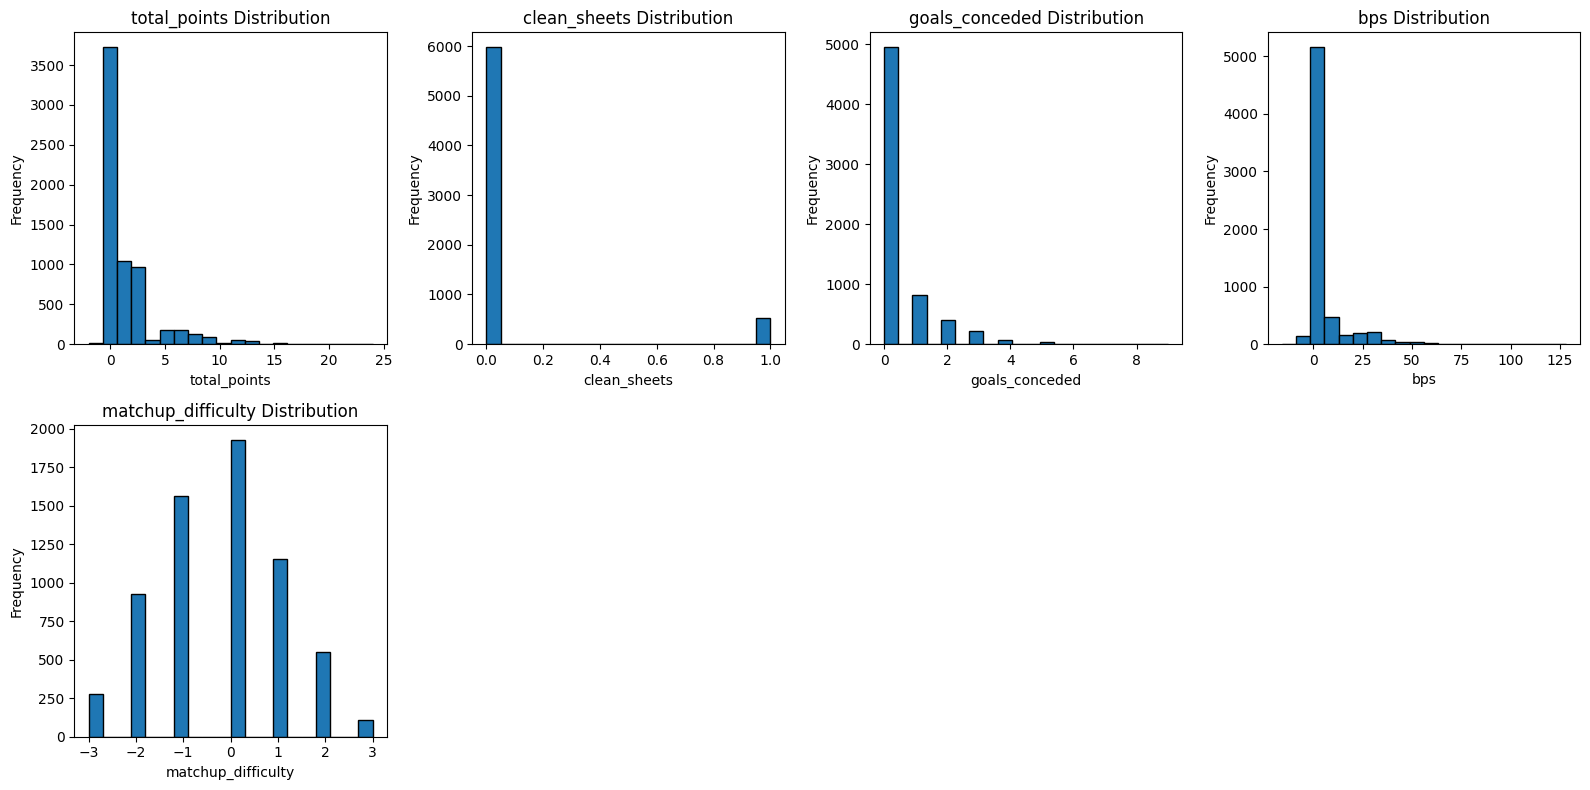

========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

Shape of windowed_df: (5943, 6)
Shape of a given window (prior to preprocessing): (3, 6)
Skill Distribution of Players:



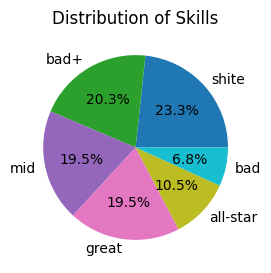

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[ 1.16742688  0.0676147   0.38073518  3.6863429  -0.28119131]

Standard Deviation of Standard Scaler:
[2.40625279 0.25108356 0.875192   9.50509071 1.32581958]
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

====== Building CNN Architecture ======
====== Done Building CNN Architecture ======
Epoch 23: early stopping
Test Loss (MSE): 5.920300006866455, Test Mean Absolute Error (MAE): 1.259545922279358


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


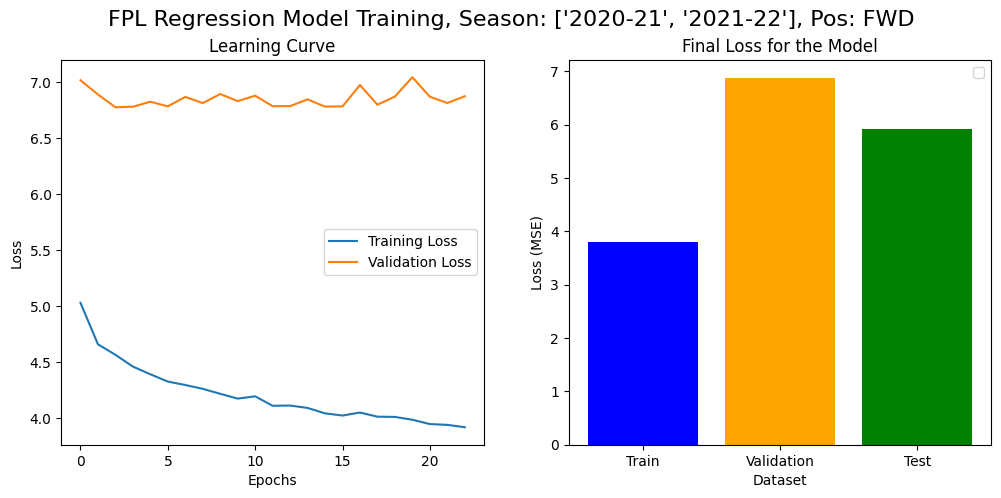

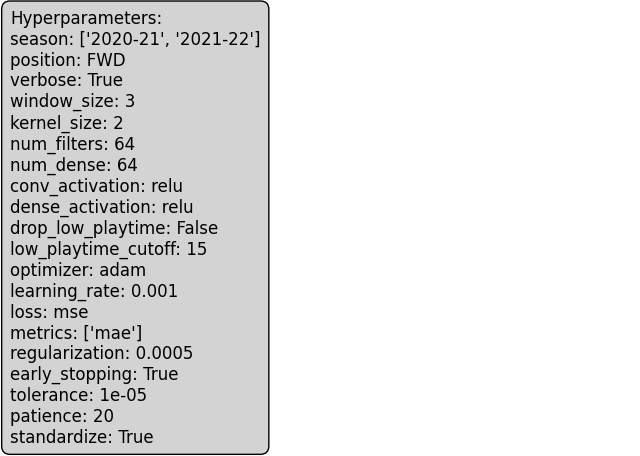

(<keras.src.engine.sequential.Sequential at 0x2bbfcf3a0>,
 {'season': ['2020-21', '2021-22'],
  'position': 'FWD',
  'train_mse': 3.7984330654144287,
  'train_mae': 0.9695603847503662,
  'val_mse': 6.872139930725098,
  'val_mae': 1.433789849281311,
  'test_mse': 5.920300006866455,
  'test_mae': 1.259545922279358,
  'verbose': True,
  'window_size': 3,
  'kernel_size': 2,
  'num_filters': 64,
  'num_dense': 64,
  'conv_activation': 'relu',
  'dense_activation': 'relu',
  'drop_low_playtime': False,
  'low_playtime_cutoff': 15,
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'loss': 'mse',
  'metrics': ['mae'],
  'regularization': 0.0005,
  'early_stopping': True,
  'tolerance': 1e-05,
  'patience': 20,
  'standardize': True})

In [12]:
STANDARD_NUM_FEATURES = ['minutes', 'goals_scored', 'assists', 'goals_conceded',
                          'clean_sheets', 'bps', 'yellow_cards', 'red_cards', 
                          'own_goals', 'saves', 'penalties_missed', 'penalties_saved',
                          'ict_index', 'total_points']
STANDARD_CAT_FEATURES = []
SEED = 229

random.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

build_train_cnn(DATA_DIR,
                season = ['2020-21', '2021-22'], 
                position = 'FWD', 
                window_size=3,
                kernel_size=2,
                num_filters=64,
                num_dense=64,
                batch_size = 32,
                epochs = 1000,  
                drop_low_playtime = False,
                low_playtime_cutoff = 15,
                num_features = ['total_points', 'clean_sheets', 'goals_conceded', 'bps', 'matchup_difficulty'],
                cat_features = STANDARD_CAT_FEATURES, 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.0005, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                standardize= True,)

# GridSearch for Best Model

In [77]:
from mlpremier.cnn.experiment import gridsearch_cnn

#gridsearch_cnn(epochs=100, verbose=False)

#PERFORMING VIA COMMAND LINE SCRIPT NOW FOR EFFICIENCY

## Investigate GridSearch Results

## V6 Best Models With Player Dropping

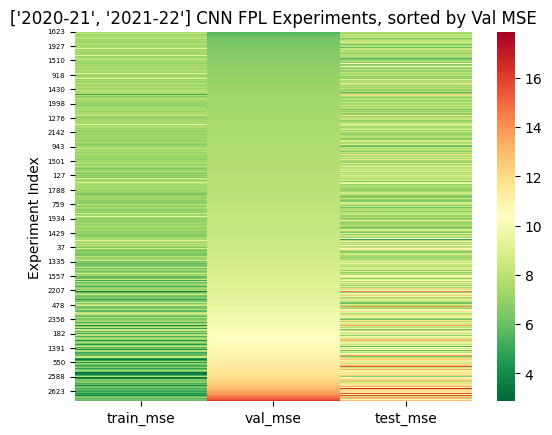


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 5 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features
GK,"['2020-21', '2021-22']",GK,3.0,1.0,64,64.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,ptsonly
DEF,"['2020-21', '2021-22']",DEF,3,1,64,64.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,large
MID,"['2020-21', '2021-22']",MID,3.0,2.0,128.0,64,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,medium
FWD,"['2020-21', '2021-22']",FWD,3.0,1.0,128,128,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,medium



['2020-21', '2021-22'] Mean Performance of Top 5 Model by Position


,train_mse,val_mse,test_mse
GK,7.763064,5.973737,7.543674
DEF,7.880770,6.345948,7.368134
MID,7.726225,5.334068,7.786359
FWD,9.595366,6.183167,8.353703



Average Performance:
7.762967610359192


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features
GK,"['2020-21', '2021-22']",GK,3.0,1.0,64,64.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,ptsonly
DEF,"['2020-21', '2021-22']",DEF,3,1,64,64.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,large
MID,"['2020-21', '2021-22']",MID,3.0,2.0,128.0,64,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,medium
FWD,"['2020-21', '2021-22']",FWD,3.0,1.0,128,128,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True,medium


In [25]:
gridsearch_analysis('results/gridsearch_v6.csv', 
                    season="['2020-21', '2021-22']", 
                    eval_top=5,
                    drop_low_playtime = True)

## V6 Best Models Without Player Dropping

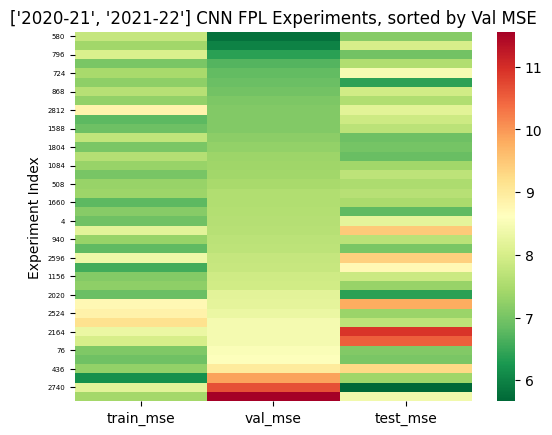


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features
GK,"['2020-21', '2021-22']",GK,9,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
DEF,"['2020-21', '2021-22']",DEF,3,2,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
MID,"['2020-21', '2021-22']",MID,3,2,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
FWD,"['2020-21', '2021-22']",FWD,9,4,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly



['2020-21', '2021-22'] Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,7.799668,5.780939,7.159147
DEF,8.038533,6.400522,6.971214
MID,7.413644,5.994377,8.014818
FWD,8.829316,7.094800,8.160402



Average Performance:
7.576395392417908


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features
GK,"['2020-21', '2021-22']",GK,9,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
DEF,"['2020-21', '2021-22']",DEF,3,2,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
MID,"['2020-21', '2021-22']",MID,3,2,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly
FWD,"['2020-21', '2021-22']",FWD,9,4,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True,ptsonly


In [34]:
gridsearch_analysis('results/gridsearch_v6.csv', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    num_dense=64,
                    num_filters=64,
                    amt_num_features = 'ptsonly',
                    drop_low_playtime = True)

## Other Models

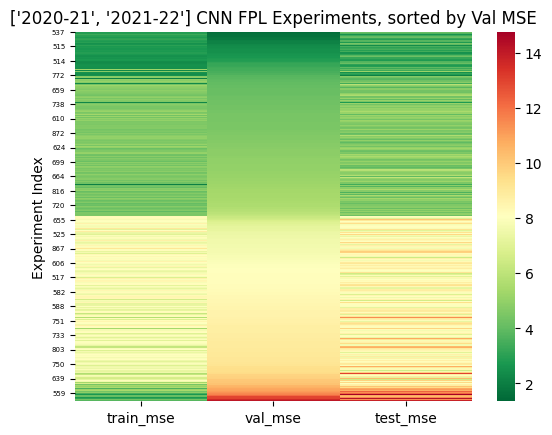


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,6,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
DEF,"['2020-21', '2021-22']",DEF,6,1,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
MID,"['2020-21', '2021-22']",MID,9,3,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
FWD,"['2020-21', '2021-22']",FWD,6,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True



['2020-21', '2021-22'] Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,3.017067,1.354558,3.231826
DEF,5.195624,4.065986,4.967775
MID,5.203198,3.418591,4.020970
FWD,5.022539,3.957532,4.335554



Average Performance:
4.139031410217285


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,6,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
DEF,"['2020-21', '2021-22']",DEF,6,1,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
MID,"['2020-21', '2021-22']",MID,9,3,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True
FWD,"['2020-21', '2021-22']",FWD,6,2,64,64,relu,relu,True,0,adam,0.01,mse,['mae'],0.001,True,0.00001,20,True


In [19]:
gridsearch_analysis('results/_gridsearch_v4.csv', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1)

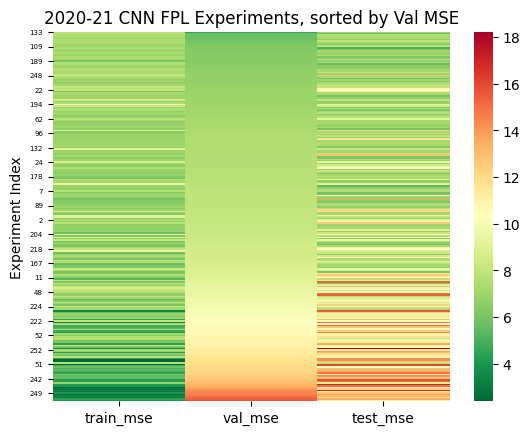


2020-21 Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,2020-21,GK,3,2,128,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,2020-21,DEF,3,2,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,2020-21,MID,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
FWD,2020-21,FWD,9,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True



2020-21 Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,8.141123,6.824385,7.916274
DEF,7.361140,5.961607,7.985064
MID,7.806750,4.545766,7.036894
FWD,8.474202,6.671063,12.801478



Average Performance:
8.934927344322205


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,2020-21,GK,3,2,128,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,2020-21,DEF,3,2,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,2020-21,MID,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
FWD,2020-21,FWD,9,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True


In [20]:
gridsearch_analysis('results/gridsearch_v4_singleyear_drop.csv', 
                    season='2020-21',
                    eval_top=1)

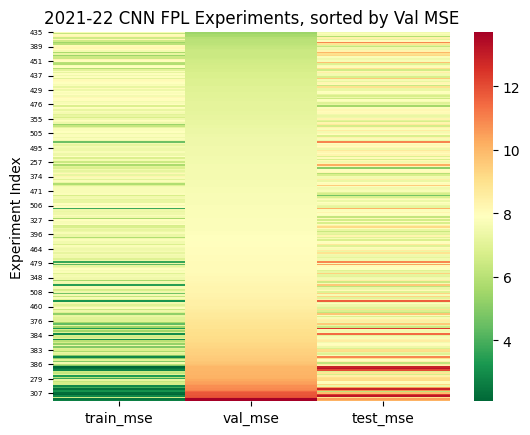


2021-22 Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,2021-22,GK,3,1,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,2021-22,DEF,3,1,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,2021-22,MID,9,2,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
FWD,2021-22,FWD,3,2,128,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True



2021-22 Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,6.282449,5.409356,7.727600
DEF,8.258613,6.538323,7.482368
MID,7.688234,5.407370,7.526227
FWD,8.200192,6.277791,7.468069



Average Performance:
7.551065683364868


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,2021-22,GK,3,1,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,2021-22,DEF,3,1,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,2021-22,MID,9,2,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
FWD,2021-22,FWD,3,2,128,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True


In [21]:
gridsearch_analysis('results/gridsearch_v4_singleyear_drop.csv', 
                    season='2021-22',
                    eval_top=1)

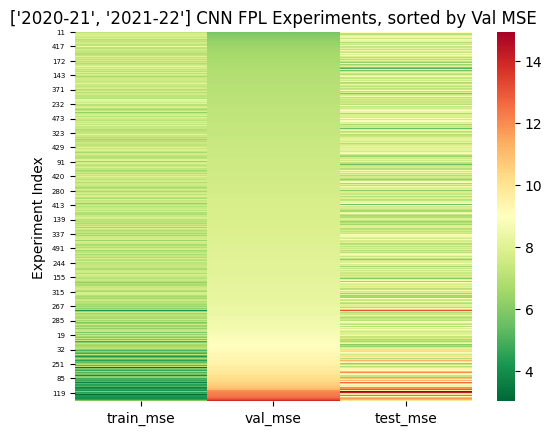


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 3 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,"['2020-21', '2021-22']",DEF,6,2,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,"['2020-21', '2021-22']",MID,3,2.0,64.0,128.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True
FWD,"['2020-21', '2021-22']",FWD,6,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True



['2020-21', '2021-22'] Mean Performance of Top 3 Model by Position


,train_mse,val_mse,test_mse
GK,7.726385,5.961474,7.941252
DEF,7.698494,6.388040,7.966989
MID,7.488968,5.829319,8.056349
FWD,8.242097,6.646223,7.732026



Average Performance:
7.924153963724772


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,"['2020-21', '2021-22']",DEF,6,2,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,"['2020-21', '2021-22']",MID,3,2.0,64.0,128.0,relu,relu,True,15.0,adam,0.01,mse,['mae'],0.001,True,0.0001,20.0,True
FWD,"['2020-21', '2021-22']",FWD,6,3,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True


In [22]:
gridsearch_analysis('results/gridsearch_v5.csv', eval_top=3)

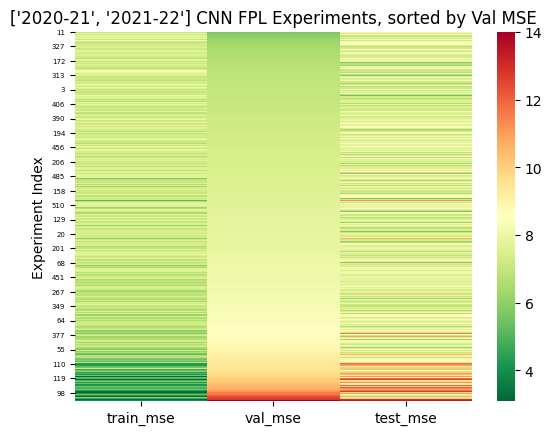


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,optimizer,learning_rate,loss,metrics,regularization,early_stopping,tolerance,patience,standardize
GK,"['2020-21', '2021-22']",GK,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
DEF,"['2020-21', '2021-22']",DEF,3,1,128,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
MID,"['2020-21', '2021-22']",MID,6,2,64,128,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True
FWD,"['2020-21', '2021-22']",FWD,6,1,64,64,relu,relu,True,15,adam,0.01,mse,['mae'],0.001,True,0.0001,20,True



['2020-21', '2021-22'] Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse
GK,7.776814,5.582450,7.750151
DEF,7.976913,6.024108,8.130019
MID,7.096155,5.641898,8.965348
FWD,8.390717,6.224425,7.164237



Average Performance:
8.00243878364563


In [23]:
best_hyperparams = gridsearch_analysis('results/gridsearch_v4_optimal_drop.csv', 
                    eval_top=1)